-- Introduction and Problem Statement

This task aims to predict whether a customer will accept a personal loan offer based on features like age, job, marital status, and more.

-- Dataset Understanding and Description

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv('bank-full.csv', sep=';')  # Make sure the CSV file is in your directory

# Structure
print("Shape:", df.shape)
print("Columns:", df.columns)
df.head()

Shape: (45211, 17)
Columns: Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


-- Data Cleaning and Preparation

In [2]:
# Check missing values
print(df.isnull().sum())

# Encode categorical columns using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,2143,5,261,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,44,29,5,151,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,33,2,5,76,1,-1,0,False,True,False,...,False,False,True,False,False,False,False,False,True,False
3,47,1506,5,92,1,-1,0,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,33,1,5,198,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False


-- Exploratory Data Analysis (EDA)

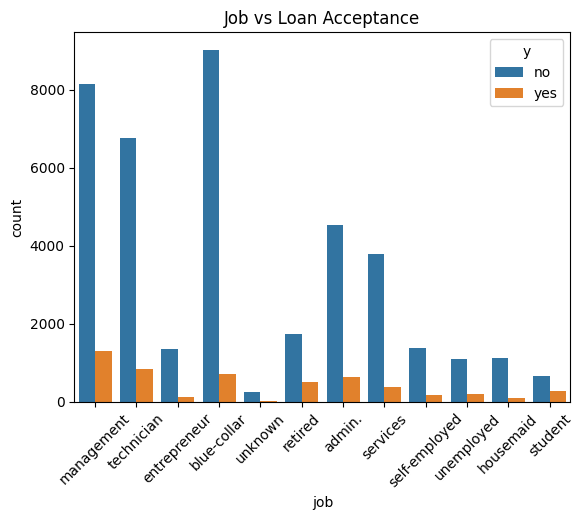

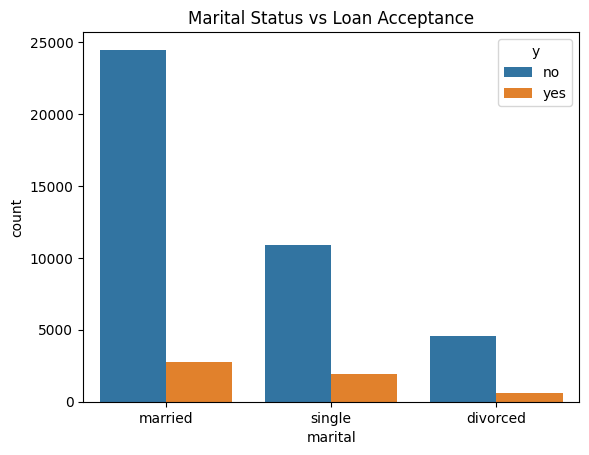

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Job vs Loan Acceptance
sns.countplot(data=df, x='job', hue='y')
plt.xticks(rotation=45)
plt.title("Job vs Loan Acceptance")
plt.show()

# Marital status vs Loan Acceptance
sns.countplot(data=df, x='marital', hue='y')
plt.title("Marital Status vs Loan Acceptance")
plt.show()

-- Model Training and Testing

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Features and target
X = df_encoded.drop('y_yes', axis=1)
y = df_encoded['y_yes']  # Target: 1 if loan accepted, else 0

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

-- Evaluation Metrics

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8987061815769103

Confusion Matrix:
 [[7754  226]
 [ 690  373]]

Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.97      0.94      7980
        True       0.62      0.35      0.45      1063

    accuracy                           0.90      9043
   macro avg       0.77      0.66      0.70      9043
weighted avg       0.88      0.90      0.89      9043



-- Conclusion

- Logistic Regression model was trained to predict loan acceptance.
- Job, marital status, and education level influenced acceptance rates.
- The model showed decent accuracy and revealed insights into customer behavior.